<a href="https://colab.research.google.com/github/alfisuryap/PengolahanCitraDanVisiKomputer/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 9: Morfologi**

Nama: Alfi Surya Pratama

NIM: 2141720075

Kelas: TI-3D

Mata Kuliah: Machine Learning

## **Tugas Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

    Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan *Structuring Element* Dilasi (SED) berbentuk **cross 3 x 3 tanpa** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

In [17]:
def dilasi(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape

    # Hitung ukuran padding untuk menghindari out-of-bounds
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Inisialisasi citra hasil dilasi
    dilated_image = np.zeros_like(image)

    for y in range(pad_height, height - pad_height):
        for x in range(pad_width, width - pad_width):
            # Bagian citra di bawah kernel
            image_patch = image[y - pad_height:y + pad_height + 1, x - pad_width:x + pad_width + 1]

            # Dilasi: Pilih nilai maksimum dalam kernel
            dilated_image[y, x] = np.max(image_patch * kernel)

    return dilated_image

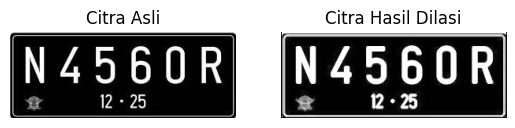

In [118]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element Dilasi (SED) berbentuk cross 3x3
kernel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

# Aplikasikan dilasi pada citra
dilated_image = dilasi(image, kernel)

# Tampilkan citra asli dan hasil dilasi
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

4. Buatlah program implementasi operasi dilasi *Structuring Element* Dilasi (SED) berbentuk **cross 3 x 3 dengan** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

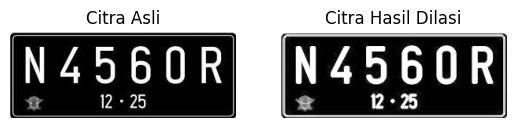

In [119]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element Dilasi (SED) berbentuk cross 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Aplikasikan operasi dilasi dengan OpenCV
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Tampilkan citra asli dan hasil dilasi
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil dilasi pada citra dengan *Structuring Element* Erosi (SE) berbentuk square 5 x 5 **tanpa** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

In [33]:
def erosi(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape

    # Hitung ukuran padding untuk menghindari out-of-bounds
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros_like(image)

    for y in range(pad_height, height - pad_height):
        for x in range(pad_width, width - pad_width):
            # Bagian citra di bawah kernel
            image_patch = image[y - pad_height:y + pad_height + 1, x - pad_width:x + pad_width + 1]

            # Erosi: Pilih nilai minimum dalam kernel
            eroded_image[y, x] = np.min(image_patch * kernel)

    return eroded_image

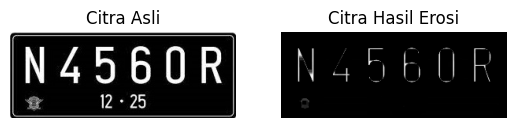

In [120]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element Erosi (SE) berbentuk square 5x5
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)

# Aplikasikan erosi pada citra
eroded_image = erosi(image, kernel)

# Tampilkan citra asli dan hasil erosi
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

6. Buatlah program implementasi operasi erosi  pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 **dengan** menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

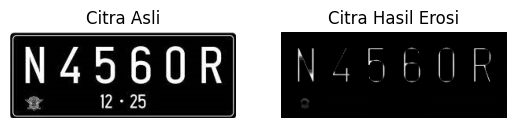

In [121]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element Erosi (SE) berbentuk square 5x5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Aplikasikan operasi erosi dengan OpenCV
eroded_image = cv2.erode(image, kernel, iterations=1)

# Tampilkan citra asli dan hasil erosi
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

7. Buatlah program implementasi operasi opening dengan *Structuring Element*
berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:  

**Operasi Opening Menggunakan tanpa Library Morphology**

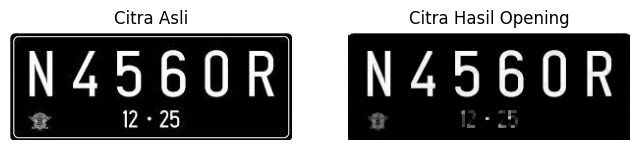

In [48]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk square 3x3
kernel = np.ones((3, 3), dtype=np.uint8)

# Operasi erosi
eroded_image = cv2.erode(image, kernel, iterations=1)

# Operasi dilasi
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Tampilkan citra asli dan hasil opening
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.show()

**Operasi Opening Menggunakan Library Morphology**

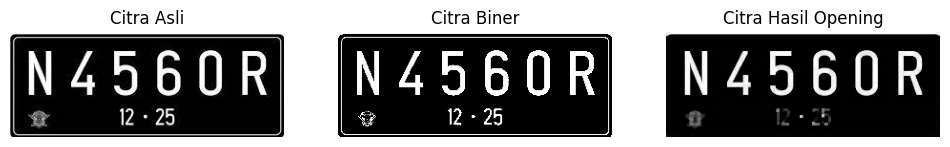

In [51]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Aplikasikan operasi erosi (dengan OpenCV)
eroded_image = cv2.erode(image, kernel, iterations=1)

# Aplikasikan operasi dilasi (dengan OpenCV)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Tampilkan citra asli, citra biner, dan hasil opening
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

# Binerkan citra dengan threshold
ret, binarized_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 3, 2)
plt.imshow(binarized_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.show()

8. Buatlah program implementasi operasi closing dengan *Structuring Element* berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

**Operasi closing tanpa library morphology**

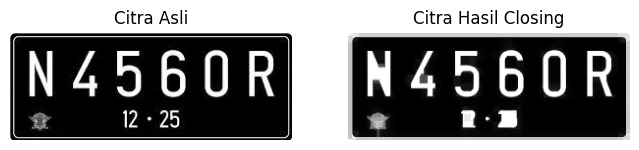

In [54]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk square 3x3
kernel = np.ones((7, 7), dtype=np.uint8)

# Operasi dilasi
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Operasi erosi
closed_image = cv2.erode(dilated_image, kernel, iterations=1)

# Tampilkan citra asli dan hasil closing
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')
plt.axis('off')

plt.show()

**Operasi closing dengan library morphology**

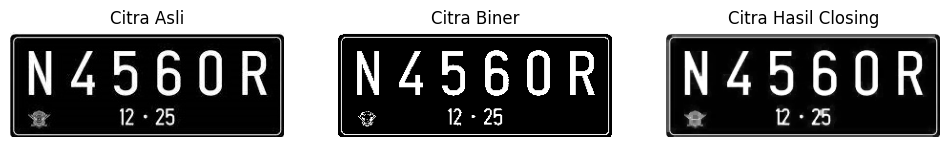

In [58]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Aplikasikan operasi dilasi (dengan OpenCV)
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Aplikasikan operasi erosi (dengan OpenCV)
closed_image = cv2.erode(dilated_image, kernel, iterations=1)

# Tampilkan citra asli, citra biner, dan hasil closing
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

# Binerkan citra dengan threshold
ret, binarized_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 3, 2)
plt.imshow(binarized_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')
plt.axis('off')

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk **Cross 3 x 3 dan 5 x 5**, sehingga menghasilkan tampilan seperti di bawah ini:

**Cross 3**

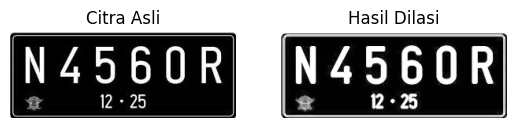

In [65]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk Cross 3x3
kernel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

# Aplikasikan operasi dilasi
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Tampilkan citra asli dan hasil dilasi
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Hasil Dilasi')
plt.axis('off')

plt.show()

**Cross 5**

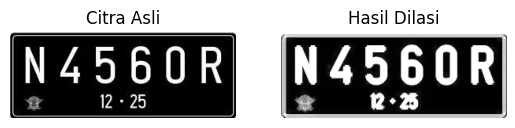

In [66]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk Cross 5X5
kernel = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)

# Aplikasikan operasi dilasi
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Tampilkan citra asli dan hasil dilasi
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Hasil Dilasi')
plt.axis('off')

plt.show()

10. Buatlah program implementasi operasi dilasi dengan *Structuring Element* berbentuk **Circular 3 x 3 dan 5 x 5**, sehingga menghasilkan tampilan seperti di bawah ini:

**Circular 3x3**

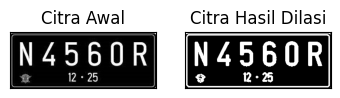

In [109]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

img_d= cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Circular 5x5**

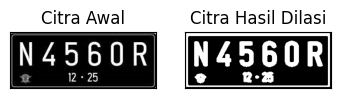

In [110]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

img_d= cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

11.  Buatlah program implementasi operasi erosi dengan *Structuring Element* berbentuk **Rectangle 3 x 5 dan 5 x 7**, sehingga menghasilkan tampilan seperti di bawah ini:

**Rectangle 3x5**

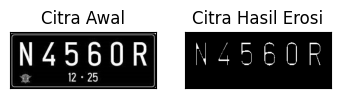

In [112]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

img_e= cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

**Rectangle 5x7**

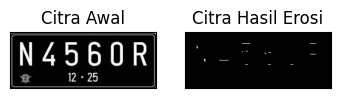

In [113]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

img_e= cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. Buatlah program implementasi operasi erosi dengan *Structuring Element* berbentuk **Line Vertikal 3 dan 5**, sehingga menghasilkan tampilan seperti di bawah ini:

**Line Vertikal 3**

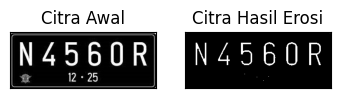

In [116]:
def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product=temp*SE
      imgE[i,j]=np.min(product)

  return imgE

img_e= cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Line Vertikal 5**

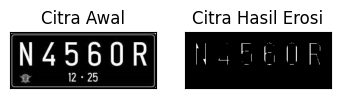

In [117]:
def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product=temp*SE
      imgE[i,j]=np.min(product)

  return imgE

img_e= cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

13. Top Hat

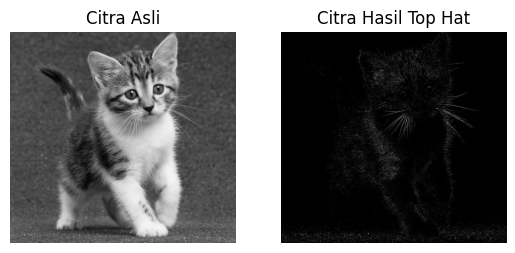

In [82]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element
kernel = np.ones((3, 3), dtype=np.uint8)

# Aplikasikan operasi top-hat
tophat_image = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

# Tampilkan citra asli dan hasil top-hat
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tophat_image, cmap='gray')
plt.title('Citra Hasil Top Hat')
plt.axis('off')

plt.show()

14. Black Hat

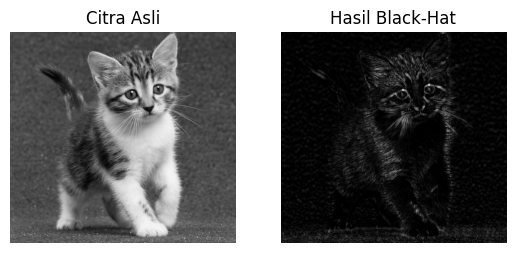

In [76]:
# Load gambar
image = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element
kernel = np.ones((13, 5), dtype=np.uint8)

# Aplikasikan operasi black-hat
blackhat_image = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

# Tampilkan citra asli dan hasil black-hat
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blackhat_image, cmap='gray')
plt.title('Hasil Black-Hat')
plt.axis('off')

plt.show()

15. Skeleton

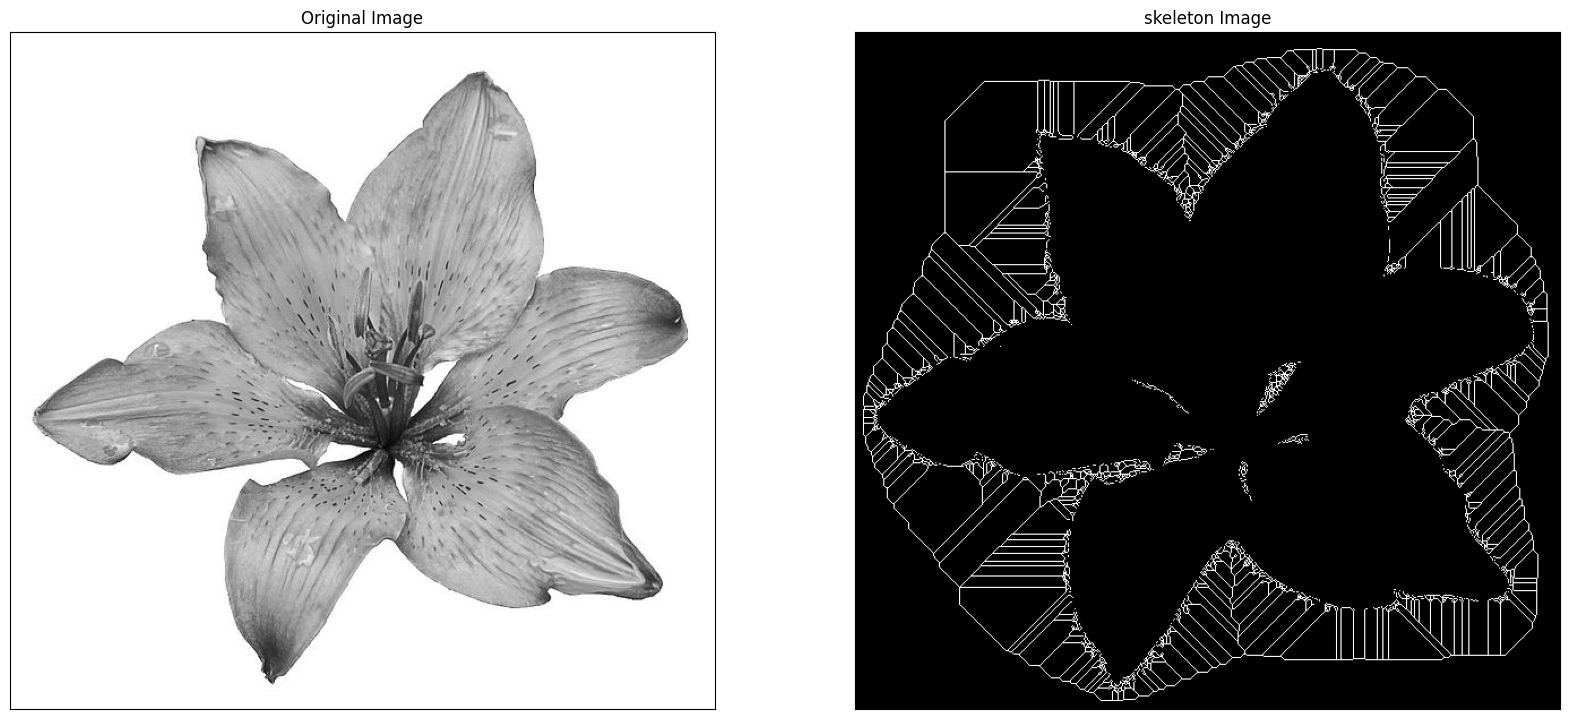

In [99]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# Load gambar
img = cv2.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/lily.jpg', 0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

16. Skeleton Inverse

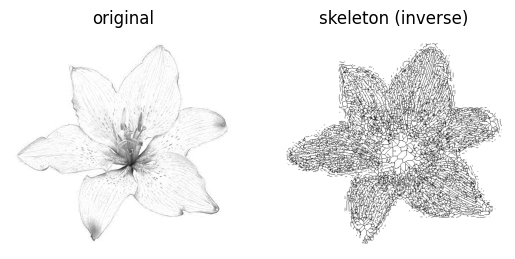

In [101]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters

from skimage.morphology import skeletonize

# Load gambar
img = io.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

17. Thickening

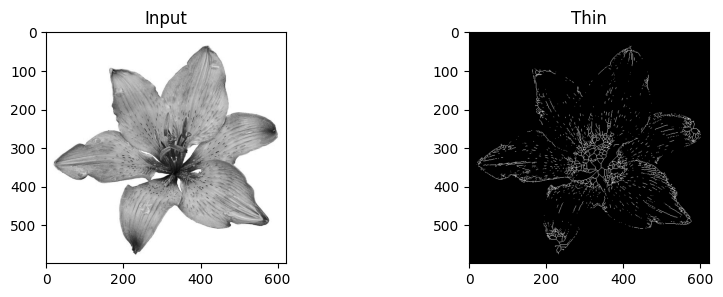

In [102]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/College/Semester 5/Pengolahan Citra dan Visi Komputer/Data/Jobsheet 9/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

## **Tugas Praktikum**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

### **Dilasi**

### **Erosi**

### **Opening**

### **Closing**